# Air Quality Data Analysis & Prediction
### PRSA Dataset
**Author:** Ross Smith  
**Student ID:** 20314700
**Module:** CMP7005 Prac 1


# Introduction

The aim of this project was to analyse and predict PM2.5 air pollutant levels using real-world environmental data from Beijing, China. PM2.5 is considered one of the most harmful air pollutants due to its ability to penetrate deep into the lungs and bloodstream. Accurate prediction of PM2.5 levels can support public health decisions and pollution mitigation strategies.

To achieve this, the project applies a complete data science pipeline, from data cleaning and exploratory analysis, to model building, evaluation, and deployment in an interactive application. A key emphasis was placed on ensuring data quality, responsible modelling, and intuitive user experience via a custom-built Streamlit web interface. The project also adhered to professional development standards through effective version control and reproducibility.


#1: Identifying Missing Values in Each Dataset

Before merging the air quality datasets from different monitoring stations, it's important to assess their data quality. This step involves checking for missing values in each CSV file to determine which datasets are the cleanest and most reliable for analysis.

By looping through each file and calculating the total number of missing entries, we can identify datasets that may require more extensive cleaning or even exclusion from the merging process. This helps ensure that our final merged dataset is as complete and accurate as possible.



In [5]:
import os
import pandas as pd

# loading the files for the urban areas
file_list_urban = [
    "/content/merging/PRSA_Data_Dongsi_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Tiantan_20130301-20170228.csv",
]

# Check missing values for each
for file in file_list_urban:
    df = pd.read_csv(file)
    missing_count = df.isnull().sum().sum()
    print(f"{file}: {missing_count} missing values")

print("\n") # a new line so we can clearly see the seperate catagories

# loading the files for the sub urban areas
file_list_suburban = [
    "/content/merging/PRSA_Data_Changping_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Gucheng_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Shunyi_20130301-20170228.csv",
]

# Check missing values for each
for file in file_list_suburban:
    df = pd.read_csv(file)
    missing_count = df.isnull().sum().sum()
    print(f"{file}: {missing_count} missing values")

print("\n")

# loading the files for the Rural areas
file_list_rural = [
    "/content/merging/PRSA_Data_Huairou_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Dingling_20130301-20170228.csv",
]

# Check missing values for each
for file in file_list_rural:
    df = pd.read_csv(file)
    missing_count = df.isnull().sum().sum()
    print(f"{file}: {missing_count} missing values")

print("\n")

# loading the files for the Industrial areas
file_list_industrial = [
    "/content/merging/PRSA_Data_Dongsi_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "/content/merging/PRSA_Data_Tiantan_20130301-20170228.csv",
]

# Check missing values for each
for file in file_list_industrial:
    df = pd.read_csv(file)
    missing_count = df.isnull().sum().sum()
    print(f"{file}: {missing_count} missing values")

/content/merging/PRSA_Data_Dongsi_20130301-20170228.csv: 7600 missing values
/content/merging/PRSA_Data_Guanyuan_20130301-20170228.csv: 5279 missing values
/content/merging/PRSA_Data_Tiantan_20130301-20170228.csv: 5277 missing values


/content/merging/PRSA_Data_Changping_20130301-20170228.csv: 5166 missing values
/content/merging/PRSA_Data_Gucheng_20130301-20170228.csv: 4728 missing values
/content/merging/PRSA_Data_Shunyi_20130301-20170228.csv: 8523 missing values


/content/merging/PRSA_Data_Huairou_20130301-20170228.csv: 7485 missing values
/content/merging/PRSA_Data_Dingling_20130301-20170228.csv: 7015 missing values


/content/merging/PRSA_Data_Dongsi_20130301-20170228.csv: 7600 missing values
/content/merging/PRSA_Data_Guanyuan_20130301-20170228.csv: 5279 missing values
/content/merging/PRSA_Data_Tiantan_20130301-20170228.csv: 5277 missing values


# 2: Merging Datasets and Exploring the Merged Data

After identifying and selecting the cleanest datasets, the next step is to merge them into a single, unified dataset for analysis. Each dataset represents air quality measurements from a specific monitoring station and is tagged with a location type (e.g., urban, suburban, industrial, rural) before merging. This added column helps distinguish between data sources in later analysis.

Once merged, the combined dataset is saved as `merged_PRSA_data.csv`. To better understand the structure and completeness of the data, we inspect the following:

- **`df.shape`**: Total number of rows and columns
- **`df.dtypes`**: Names and data types of each column
- **`df.head()`**: Preview of the first few rows of data
- **`df.isnull().sum()`**: Missing values per column

These commands help us confirm the success of the merge and give an overview of the data's structure and integrity before proceeding with cleaning and analysis.

We can also use the missingno library to create a matrix so we can visualise this missing data, which can be used later when developing the application.

With this done, we can begin the EDA to clean and visualise the data.

Files successfully merged and saved as 'merged_PRSA_data.csv'
Number of rows and columns:
 (140256, 19)
Column names and data types:
 No                int64
year              int64
month             int64
day               int64
hour              int64
PM2.5           float64
PM10            float64
SO2             float64
NO2             float64
CO              float64
O3              float64
TEMP            float64
PRES            float64
DEWP            float64
RAIN            float64
wd               object
WSPM            float64
station          object
LocationType     object
dtype: object
Sample of dataset:
    No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4

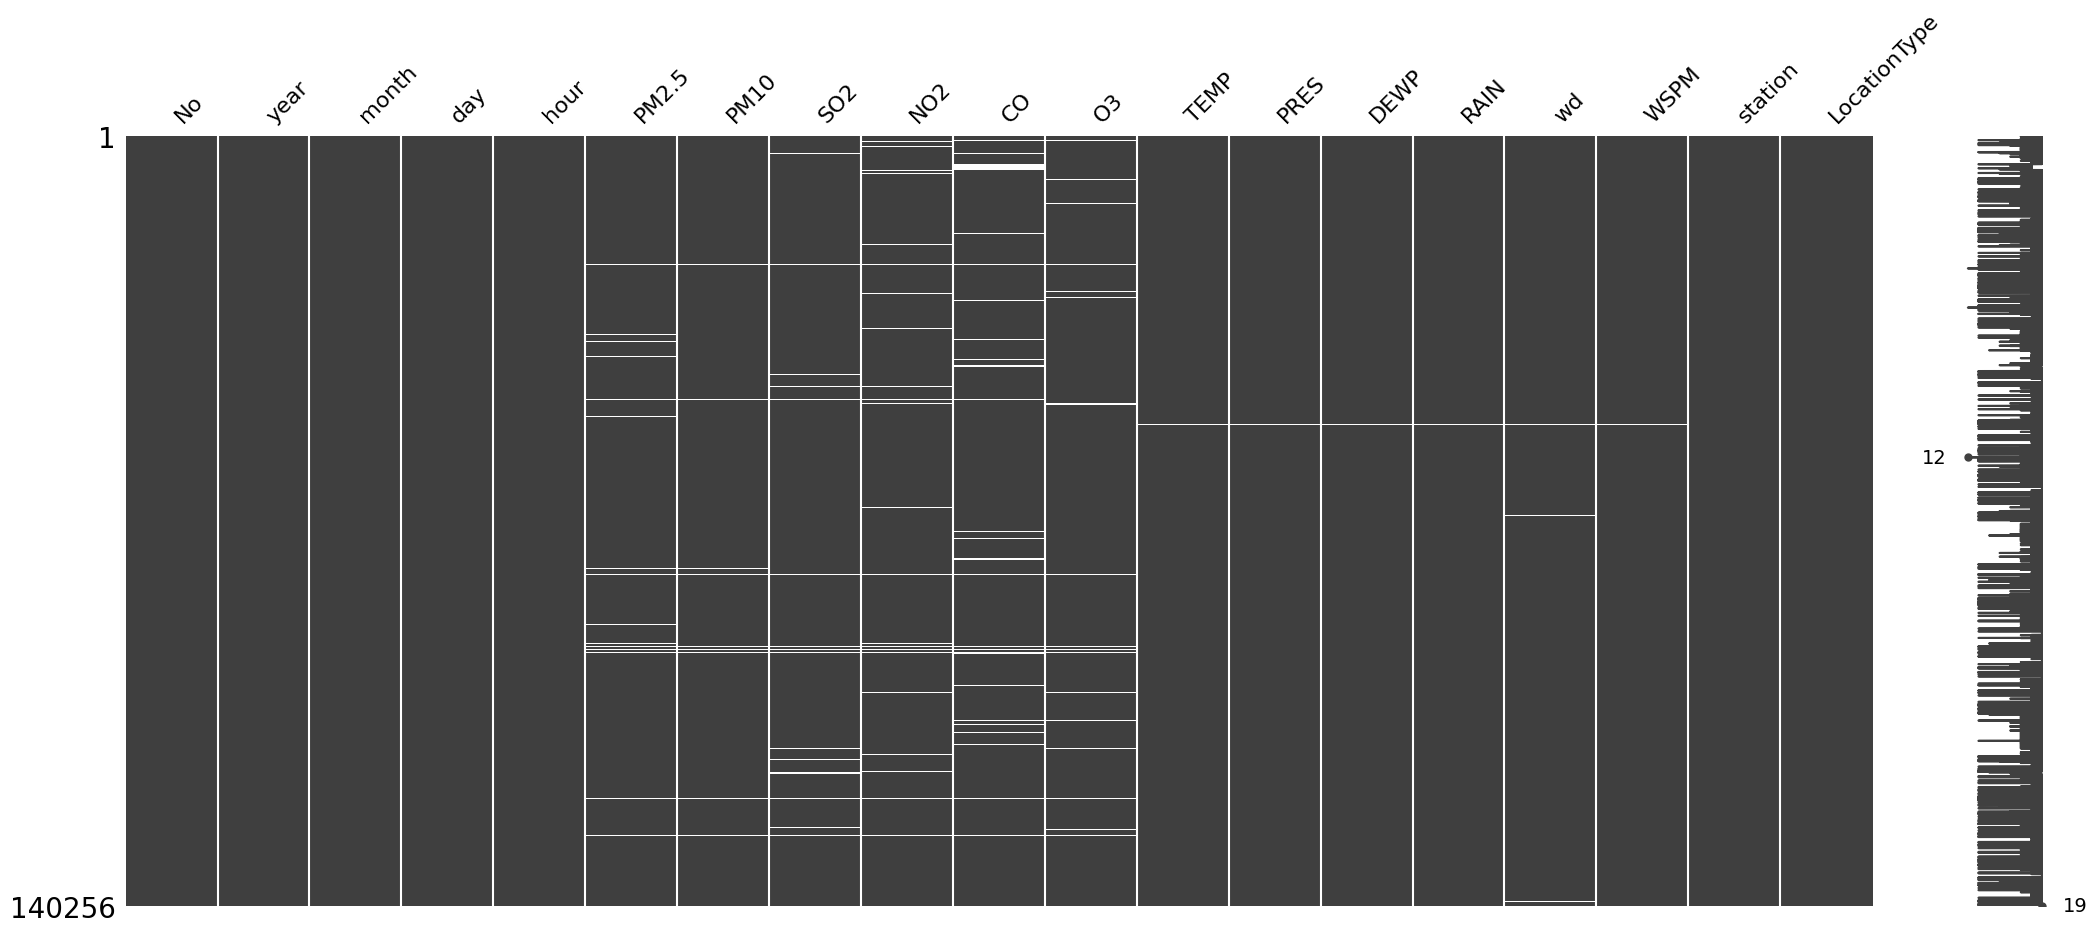

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the specific file paths and their location types
files_info = {
    "/content/merging/PRSA_Data_Dingling_20130301-20170228.csv": "Rural",
    "/content/merging/PRSA_Data_Gucheng_20130301-20170228.csv": "Suburban",
    "/content/merging/PRSA_Data_Nongzhanguan_20130301-20170228.csv": "Industrial",
    "/content/merging/PRSA_Data_Tiantan_20130301-20170228.csv": "Urban"
}

# Read and label each file
dataframes = []
for path, location in files_info.items():
    df = pd.read_csv(path)
    df['LocationType'] = location  # Add a column to tag location type
    dataframes.append(df)

# Merge all into a single DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataset to your workspace
merged_df.to_csv("/content/merged_PRSA_data.csv", index=False)
missing = df.isnull().sum()

print("Files successfully merged and saved as 'merged_PRSA_data.csv'")

# Load the merged dataset
df = pd.read_csv('/content/merging/merged_PRSA_data.csv')


# Check how many missing values per column along with other info
missing = df.isnull().sum()

print("Number of rows and columns:\n", df.shape)
print("Column names and data types:\n", df.dtypes)
print("Sample of dataset:\n", df.head())
print("Missing values:\n", missing)

# Visualise the missing data
import missingno as msno
msno.matrix(df)
plt.show()

## 3: Data Cleaning and Preprocessing

###  3.1 Fundamental Data Understanding

The merged dataset contains hourly air quality and meteorological data collected from four types of locations: urban, rural, suburban, and industrial. It consists of **140,256 rows and 19 columns**, including the `LocationType` column we added earlier.

Initial inspection revealed several missing values, especially in pollutant-related columns. The dataset includes a mix of numerical data types (float, int) and some string values such as station names and wind direction. This exploration phase was essential for making informed decisions in the cleaning process.

Based on research, we identified **PM2.5** as the central focus of our analysis, given its high risk to human health. Therefore, cleaning methods were prioritised with this pollutant in mind.

---

###  3.2 Data Preprocessing

We explored several strategies to handle missing data:

- **Filling with median values**: Initially considered but rejected for pollutants due to extreme spikes in the data.
- **Dropping missing rows**: Too aggressive, as it would have removed over 40,000 rows.
-  **Hybrid approach**: Ultimately chosen to preserve data reliability while minimising loss.

**Approach Used:**

- **Pollutant Columns (Critical)**: Rows with missing values were dropped to preserve data accuracy.
- **Weather Columns**: Missing values were filled with the **median**, which is more robust against outliers than the mean.
- **Wind Direction** was excluded from imputation due to being a string and was treated as critical (rows with missing values were dropped).

This method ensured the pollutant data remained accurate and the weather data consistent, resulting in a clean dataset that was saved for further modelling. We use the missingno to visualise that there are no missing values in our dataset.


Initial shape: (140256, 19)

Missing values after cleaning:
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
LocationType    0
dtype: int64


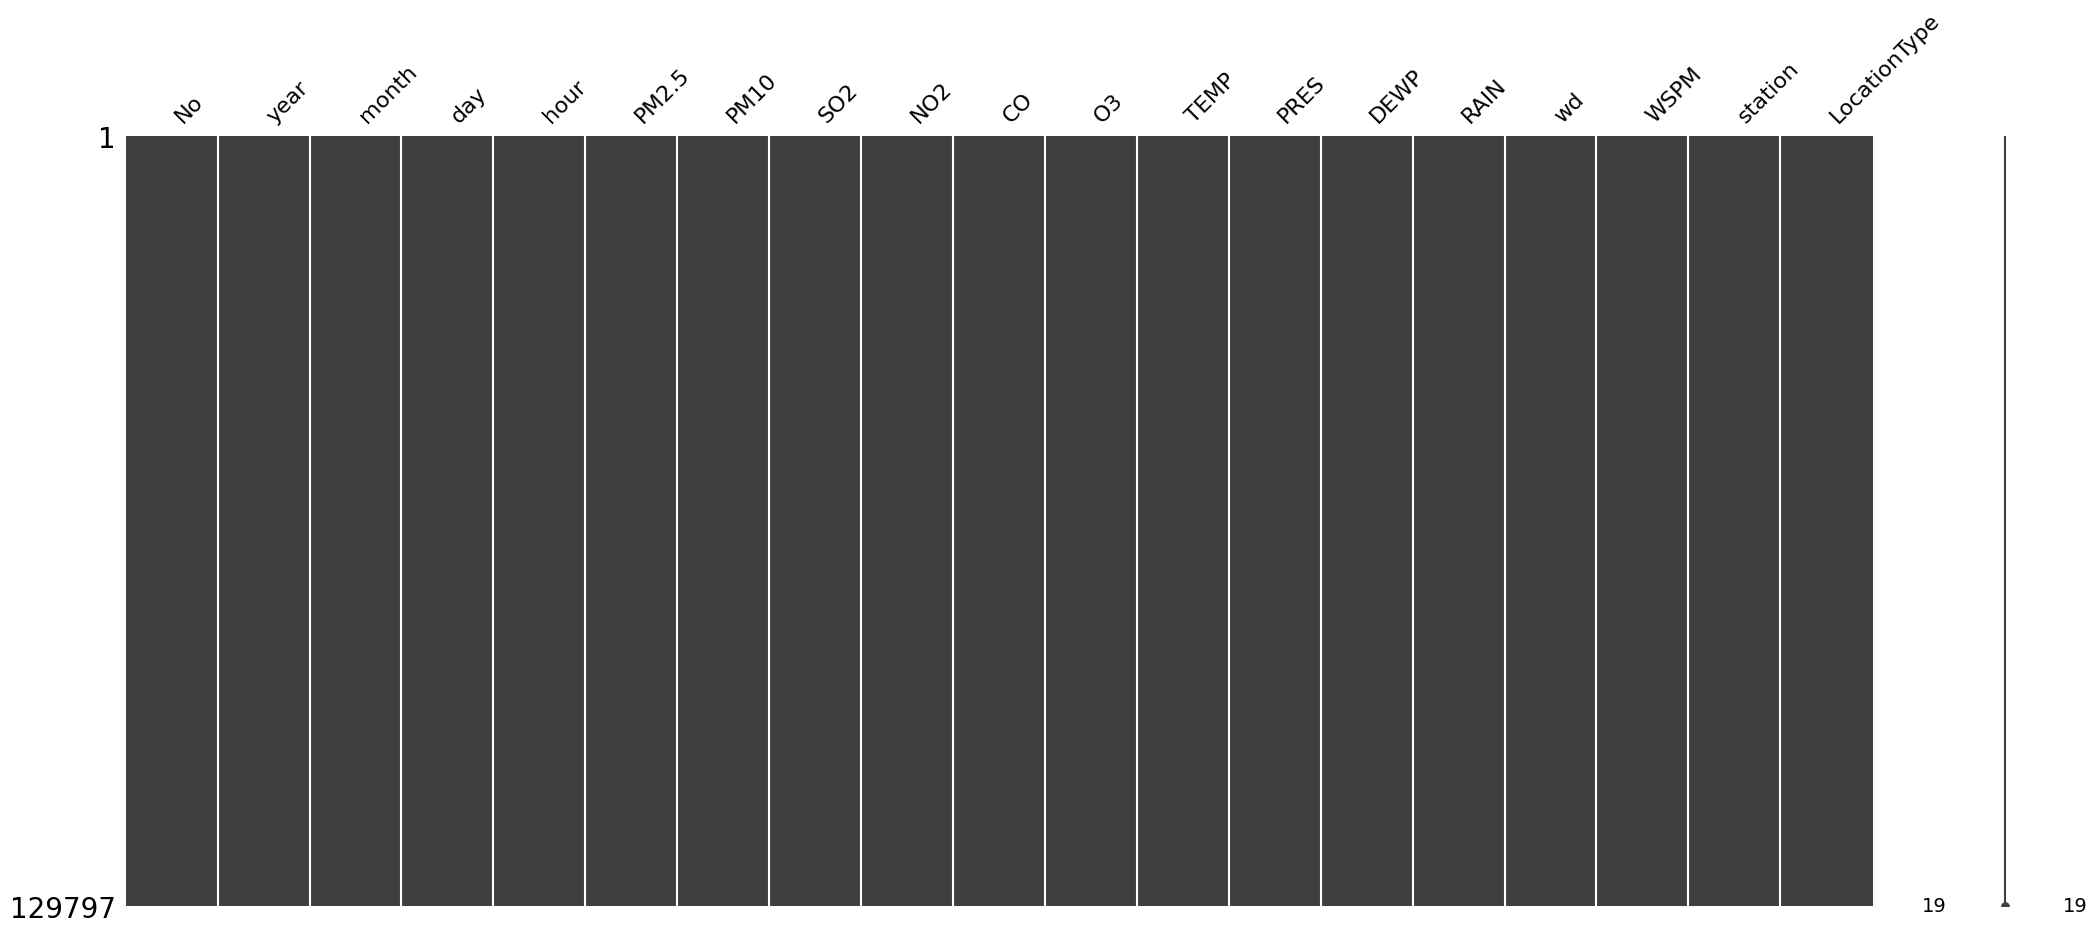


Data fully cleaned and saved


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#missingno for null visualization
import missingno as msno

# Load dataset
df = pd.read_csv('/content/merged_PRSA_data.csv')
print("Initial shape:", df.shape)

# define data column types
critical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'wd']
weather_columns = ['RAIN', 'TEMP', 'DEWP', 'PRES', 'WSPM']

# Drop rows where important pollutants are missing
df = df.dropna(subset=critical_columns)

# Fill missing weather data with median value
for col in weather_columns:
    if col in df.columns:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)

# Double-check if any missing values left
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Visualise the missing data
import missingno as msno
msno.matrix(df)
plt.show()

df.to_csv('merged_cleaned_PRSA_data.csv', index=False)

print("\nData fully cleaned and saved")

##   4: Statistical Analysis and Visualisation

With the clean dataset created, we were able to investigate the data using **comprehensive statistical and visual analysis**, involving **univariate, bivariate, and multivariate** techniques. This analysis incorporated both **descriptive statistics** and a variety of **visualisation methods**.

To begin the analysis, we loaded the cleaned dataset and isolated **relevant variables** (excluding identifiers like station name, time, and wind direction). A custom list of **axis labels** was created for use in later plots. This preparation enabled a structured and readable analysis, and the CSV file was loaded using pandas and stored as a dataframe.

---

###   Univariate Analysis: Histograms

Histograms were used to examine **individual feature distributions**. Right-skewed pollutant data such as **PM2.5**, **PM10**, and **CO** indicated frequent low pollution with occasional spikes. Meteorological data like **temperature** and **dew point** showed more symmetric distributions.

---

###   Statistical Summary

Using the `df.info()` function, we generated a statistical summary that includes key descriptive statistics such as **mean**, **median**, **standard deviation**, and **interquartile range** for all relevant variables. This summary provides essential insights into the **central tendencies** and **spread** of the data, which are valuable for identifying **outliers** and **anomalies**.

For example, the variable **PM2.5** exhibited a **wide range** and a **high standard deviation**, suggesting frequent fluctuations in air quality and indicating the presence of extreme values in the dataset.


---

###   Multivariate Analysis: Correlation Heatmap

A **correlation heatmap** was generated to assess interactions among all the relevant variables simultaneously.

To create this, a **correlation matrix** was constructed using **Pearson correlation coefficients**, which measure the linear relationship between each pair of variables and return values between -1 and 1. A value close to 1 indicates a strong positive correlation, while a value near -1 implies a strong negative correlation.

The matrix was visualised using **Seaborn's heatmap**, with key parameters:
- `annot=True` to display numeric correlation values in each cell,
- `cmap="coolwarm"` to represent strength using a blue-to-red gradient,
- `tight_layout()` to ensure all axis labels are fully visible.

The results revealed:
- A **strong positive correlation** between **PM2.5 and PM10**, and **PM2.5 and CO**, indicating these pollutants often rise and fall together.
- **Negative correlations** between **PM2.5 and Temperature**, and **PM2.5 and Wind Speed**, suggesting that pollutant levels fall and rise with eachother.

These findings are useful for selecting features and are later visualised through scatter plots.


---

###   Bivariate Analysis: Boxplots

**Boxplots** were used to further investigate the presence of outliers and the variability of each feature. These plots visually confirmed the **right-skewed distributions** observed in the histograms and identified frequent outliers in variables such as **NO₂**, **O₃**, and **WSPM (wind speed)**.

Notable insights include:
- Variables like **PM2.5**, **PM10**, **SO₂**, **NO₂**, **CO**, **O₃**, **Rain**, and **WSPM** displayed many outliers, particularly towards higher values, indicating irregular spikes in pollution or environmental activity.
- Meteorological variables such as **Temperature (TEMP)**, **Pressure (PRES)**, and **Dew Point (DEWP)** showed relatively **symmetrical distributions** with fewer outliers, suggesting more stable and consistent behaviour.

This analysis supports the earlier histogram findings and helps identify features with **high variance** or **unusual behaviour** that may require special attention during modelling.

 The accompanying code loops through three variables at a time, using **Seaborn** to draw grouped boxplots in rows. It sets custom axis labels using predefined `x_labels`, and ensures unused subplots are hidden to keep the layout clean and focused.


---

###   Bivariate Relationships: Scatterplots


Following the insights gathered from the correlation heatmap, scatter plots were used to examine **bivariate relationships** between pairs of variables that showed the strongest correlations.

These visualisations help:
- Identify **linear trends** between variables
- Support **feature selection** for modelling
- Confirm or challenge initial correlation assumptions

The code uses **Seaborn**'s `regplot()` to create scatter plots with a red line of best fit, providing a clear visual cue of trend direction and strength.

#### Key Insights:
- **PM2.5 vs PM10**: Strong positive linear correlation. As PM10 levels increase, PM2.5 levels also rise. This is expected, as both are particulate matter and often share sources.
- **PM2.5 vs CO**: Moderate positive correlation. Higher PM2.5 is often associated with increased CO levels, typically from combustion activities like traffic.
- **CO vs NO₂**: Moderate correlation, likely due to shared sources such as industrial emissions and vehicles.
- **SO₂ vs PM2.5**: The relationship appeared weaker and more scattered, indicating that sulphur dioxide levels are less directly related to PM2.5 concentrations in this dataset, possibly due to varying sources or atmospheric reactions affecting SO2 concentrations independently.

These findings reveal that **pollutant variables are often interrelated**, particularly those related to combustion. However, not all relationships are strong, underscoring the **complex dynamics of air pollution**.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the clean data
df = pd.read_csv('merged_cleaned_PRSA_data.csv')

print(df.info())

relevant_columns = [
    'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',
    'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'
]

x_labels = [
    "PM2.5 Concentration (μg/m³)",     # PM2.5
    "PM10 Concentration (μg/m³)",      # PM10
    "SO₂ Concentration (μg/m³)",       # SO2
    "NO₂ Concentration (μg/m³)",       # NO2
    "CO Concentration (mg/m³)",        # CO
    "O₃ Concentration (μg/m³)",        # O3
    "Temperature (°C)",                # TEMP
    "Pressure (hPa)",                  # PRES
    "Dew Point (°C)",                  # DEWP
    "Rainfall (mm)",                   # RAIN
    "Wind Speed (m/s)"                 # WSPM
]


#  Summary Statistics
print("\nSummary Statistics:\n")
print(df[relevant_columns].describe().round(2))

#  Histograms for distribution
print("\nHistograms:\n")
df[relevant_columns].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Relevant Variables', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# First, import the function from scipy
from scipy.stats import skew

# Loop through and print skewness
for col in relevant_columns:
    skewness = skew(df[col].dropna())  # dropna() to avoid issues with missing values (there shouldnt be any but its good to check)
    print(f"Skewness for {col}: {skewness:.2f}")

print("\n Insight: The distribution of pollutant levels (PM2.5, PM10, CO, NO2) is right-skewed, suggesting that extreme pollution events occur less frequently but have a significant impact.")

#  Boxplots to spot outliers
print("\nBoxplots:\n")
plots_per_row = 3

for i in range(0, len(relevant_columns), plots_per_row):
    fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 5))  # 1 row, 3 columns

    for j in range(plots_per_row):
        if i + j < len(relevant_columns):
            sns.boxplot(data=df, x=relevant_columns[i + j], ax=axes[j])
            axes[j].set_title(f'Boxplot of {relevant_columns[i + j]}')
            axes[j].set_xlabel(x_labels[i + j])
        else:
            axes[j].set_visible(False)  # Hide empty subplots if any

    plt.tight_layout()
    plt.show()

print("\n Insight: The boxplots revealed that variables such as PM2.5, PM10, SO2, NO2, CO, O3, Rain, and WSPM exhibited a large number of outliers, especially \n toward higher values, indicating right-skewed distributions and significant variability."
"\n In contrast, meteorological variables such as Temperature (TEMP), Pressure (PRES), and Dew Point (DEWP) showed relatively symmetrical distributions with \n fewer outliers, suggesting more stable behavior across the dataset. This supports the previous histograms being right skewed")
# Make a smaller DataFrame with only the relevant columns
df_relevant = df[relevant_columns]

# Create the correlation matrix
correlation_matrix = df_relevant.corr()

# Plot the heatmap
print("\nCorrelation Heatmap:\n")
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Relevant Variables', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Insight: The heatmap reveals strong positive correlations between PM2.5 and PM10 (0.88) and between PM2.5 and CO (0.80), indicating that these pollutants \n often rise and fall together. Temperature shows a strong negative correlation with pollution levels.")

# Statistical Summary
df[relevant_columns].describe()

# Scatter plots
print("\nScatter Plots:\n")

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 rows x 2 cols

# Plot 1: PM2.5 vs PM10
sns.regplot(x='PM2.5', y='PM10', data=df, ax=axs[0, 0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axs[0, 0].set_title('PM2.5 vs PM10')

# Plot 2: PM2.5 vs CO
sns.regplot(x='PM2.5', y='CO', data=df, ax=axs[0, 1], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axs[0, 1].set_title('PM2.5 vs CO')

# Plot 3: CO vs NO2
sns.regplot(x='CO', y='NO2', data=df, ax=axs[1, 0], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axs[1, 0].set_title('CO vs NO2')

# Plot 4: CO vs PM10
sns.regplot(x='CO', y='PM10', data=df, ax=axs[1, 1], scatter_kws={'s': 20}, line_kws={'color': 'red'})
axs[1, 1].set_title('CO vs PM10')

# Tidy layout
plt.tight_layout()
plt.show()

print("Insight: The scatterplots provided insight into the relationships between key pollutant variables:"
"\n \n PM2.5 vs PM10: A strong positive linear relationship was observed, indicating that as PM10 levels increase, PM2.5 levels tend to increase similarly. This is expected, \n as both represent particulate matter of different sizes and often originate from similar sources."
"\n \n PM2.5 vs CO: A moderate positive correlation was noted, suggesting that higher concentrations of particulate matter are often associated with increased carbon monoxide \n levels, likely due to combustion-related pollution (e.g., traffic emissions)."
"\n \n CO vs NO2: Another moderate positive relationship was observed, implying that CO and NO2 may share common emission sources such as vehicle exhaust or industrial activities."
"\n \n SO2 vs PM2.5: The relationship appeared weaker and more scattered, indicating that sulfur dioxide levels are less directly related to PM2.5 concentrations in this dataset,\n possibly due to varying sources or atmospheric reactions affecting SO2 concentrations independently."
"\n \n Overall, the scatterplots highlight that several pollutants are interrelated, particularly particulate matter and gaseous pollutants associated with combustion activities. \n However, not all pollutants display strong linear relationships, reflecting the complex nature of air pollution dynamics.")

#  5: Model Building

To accurately predict **PM2.5 concentrations**, a range of machine learning models were developed, evaluated, and compared using best practices in data science. This section covers:

- Thoughtful **feature selection**
- Rigorous **preprocessing**
- Multiple **model evaluations**
- Choosing the optimal **train/test split**

The goal is to determine **which model** yields the most accurate prediction and which **train-test ratio** performs best in real-world conditions.

###  5.1 Model Preprocessing

To begin the process, we import necessary libraries:

- `pandas` and `numpy` for data manipulation  
- `matplotlib` and `seaborn` for visualisation  
- `joblib` for saving and loading trained models  
- `train_test_split` and `StandardScaler` from `sklearn` for model preparation

From the cleaned dataset, we extract:
- The **independent variables (X)** — all relevant pollutant and weather features  
- The **dependent variable (y)** — PM2.5, the target variable we aim to predict

Since all selected features are **numerical**, no categorical encoding is necessary, and we can proceed directly to scaling and splitting the data for modelling.

####  Split Comparison

This cell was used to explore how each model performed across **three different train/test splits**:

- **80/20**
- **70/30**
- **90/10**

Each model was trained and tested on all three configurations to identify not just the best algorithm, but also the optimal data split for generalisation. This comprehensive evaluation helped ensure model reliability in a variety of deployment scenarios.


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Load your cleaned dataset
df = pd.read_csv('merged_cleaned_PRSA_data.csv')

# 2. Select relevant features
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
target = 'PM2.5'

X = df[features]
y = df[target]

# 3. Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# 4. Define the splits
splits = {
    "80/20": 0.2,
    "70/30": 0.3,
    "90/10": 0.1
}

# 5. Evaluate each model on each split
for split_name, test_size in splits.items():
    print(f"\n--- Train/Test Split {split_name} ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Feature scaling (for models that benefit, like KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():
        if name == "KNN":
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        mse = mean_squared_error(y_test, preds)
        rmse = np.sqrt(mse)

        print(f"\n{name}")
        print("R² Score:", round(r2, 2))
        print("Mean Absolute Error (MAE):", round(mae, 2))
        print("Mean Squared Error (MSE):", round(mse, 2))
        print("Root Mean Squared Error (RMSE):", round(rmse, 2))



--- Train/Test Split 80/20 ---

Linear Regression
R² Score: 0.85
Mean Absolute Error (MAE): 20.52
Mean Squared Error (MSE): 978.17
Root Mean Squared Error (RMSE): 31.28

Decision Tree
R² Score: 0.88
Mean Absolute Error (MAE): 16.73
Mean Squared Error (MSE): 812.35
Root Mean Squared Error (RMSE): 28.5

Random Forest
R² Score: 0.94
Mean Absolute Error (MAE): 12.32
Mean Squared Error (MSE): 397.71
Root Mean Squared Error (RMSE): 19.94

KNN
R² Score: 0.94
Mean Absolute Error (MAE): 12.91
Mean Squared Error (MSE): 412.27
Root Mean Squared Error (RMSE): 20.3

--- Train/Test Split 70/30 ---

Linear Regression
R² Score: 0.85
Mean Absolute Error (MAE): 20.47
Mean Squared Error (MSE): 971.07
Root Mean Squared Error (RMSE): 31.16

Decision Tree
R² Score: 0.87
Mean Absolute Error (MAE): 16.77
Mean Squared Error (MSE): 823.46
Root Mean Squared Error (RMSE): 28.7

Random Forest
R² Score: 0.94
Mean Absolute Error (MAE): 12.36
Mean Squared Error (MSE): 401.92
Root Mean Squared Error (RMSE): 20.05

KN

#  6 Model Selection and Development
This section was redone after choosing the ideal split to clean up the process, which was 80/20.

With the training sets prepared, four machine learning algorithms were selected for performance comparison. These models were chosen for their variety in complexity, interpretability, and prediction capability:

- **Linear Regression**:  
  A simple baseline model that assumes a linear relationship between the features and the target (PM2.5). It is computationally efficient but may **underfit** when patterns in data are complex.

- **Decision Tree Regressor**:  
  A tree-based model that recursively splits data based on feature thresholds. It can capture **non-linear relationships**, but there's a risk of **overfitting** if not properly regularised.

- **Random Forest Regressor**:  
  An **ensemble** of decision trees that combines multiple models for better prediction. It is **robust**, improves accuracy, and is less likely to overfit.

- **K-Nearest Neighbors (KNN)**:  
  A **non-parametric**, distance-based algorithm that predicts values based on the average of nearby observations. While easy to understand and implement, its effectiveness depends heavily on **feature scaling** and **data distribution**.

---

####  Model Training & Evaluation

**Linear Regression and Decision Tree Regressor** were trained first:

- `StandardScaler` was applied to normalize data for **Linear Regression** to ensure accurate coefficient estimation.
- **Decision Trees** do not require feature scaling, so they used raw input.
- Both models were evaluated using key performance metrics:
  - **R² Score**
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **Root Mean Squared Error (RMSE)**

These metrics give a well-rounded view of how well each model predicts PM2.5 values.

---

**Random Forest and KNN Regressors** followed a similar approach:

- The **Random Forest** model, being more complex, took roughly **2 minutes to train** due to the ensemble of trees.
- **KNN**, which relies on distance calculations, required scaling with `StandardScaler`.
- Once trained and evaluated, all models were **saved using `joblib`**, along with the fitted scaler. This allows seamless reuse in a **Streamlit web application** without the need to retrain, improving performance and consistency.

---

With this information, the random forest was chosen using an 80/20 split due to it having the highest accuracy with the lowest RMSE result.


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


# Load in the clean data
df = pd.read_csv('merged_cleaned_PRSA_data.csv')
#  1. Select Features and Target

# X = features (input), y = target (what we're predicting)
relevant_columns = [
    'PM10', 'SO2', 'NO2', 'CO', 'O3',
    'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'
]
X = df[relevant_columns]
y = df['PM2.5']

# Split into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred_linreg = linreg.predict(X_test_scaled)

# Model 2: Decision Tree Regressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)  # Decision Trees don't need scaling

y_pred_dtr = dtr.predict(X_test)

# Evaluation Function

def evaluate_model(true, predicted, model_name):
    print(f"\n--- {model_name} ---")
    print(f"R² Score: {r2_score(true, predicted):.2f}")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(true, predicted):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(true, predicted):.2f}")
    print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(true, predicted)):.2f}")

#  Evaluate Both Models

evaluate_model(y_test, y_pred_linreg, "Linear Regression")
evaluate_model(y_test, y_pred_dtr, "Decision Tree Regressor")

# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n--- Random Forest Regressor ---")
print("R² Score:", round(r2_score(y_test, rf_preds), 2))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, rf_preds), 2))
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, rf_preds), 2))
print("Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_test, rf_preds)), 2))

# Model 4: K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("\n--- K-Nearest Neighbors Regressor ---")
print("R² Score:", round(r2_score(y_test, knn_preds), 2))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_test, knn_preds), 2))
print("Mean Squared Error (MSE):", round(mean_squared_error(y_test, knn_preds), 2))
print("Root Mean Squared Error (RMSE):", round(np.sqrt(mean_squared_error(y_test, knn_preds)), 2))

# save the models and scaler for the app
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')



--- Linear Regression ---
R² Score: 0.85
Mean Absolute Error (MAE): 20.52
Mean Squared Error (MSE): 978.17
Root Mean Squared Error (RMSE): 31.28

--- Decision Tree Regressor ---
R² Score: 0.88
Mean Absolute Error (MAE): 16.73
Mean Squared Error (MSE): 812.35
Root Mean Squared Error (RMSE): 28.50

--- Random Forest Regressor ---
R² Score: 0.94
Mean Absolute Error (MAE): 12.32
Mean Squared Error (MSE): 397.71
Root Mean Squared Error (RMSE): 19.94

--- K-Nearest Neighbors Regressor ---
R² Score: 0.91
Mean Absolute Error (MAE): 15.01
Mean Squared Error (MSE): 579.46
Root Mean Squared Error (RMSE): 24.07


['knn_model.pkl']

#Running Application

In [23]:
from google.colab import drive
drive.mount('/content/drive')
#load all folders in the merging folder via google drive
%cd '/content/drive/MyDrive/data assignment/merging'
# or you could load the local folder using

#from google.colab import files
#uploaded = files.upload('/content/merging')  # Upload your app.py and CSV files when prompted

%ls

!pip install streamlit

!wget -q -O - ipv4.icanhazip.com


!streamlit run app.py & npx localtunnel --port 8501

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/data assignment/merging
app.py                        merged_PRSA_data.csv     scaler.pkl
knn_model.pkl                 navigation.png/
merged_cleaned_PRSA_data.csv  random_forest_model.pkl
34.125.7.8


⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.7.8:8501

⠸⠼⠴your url is: https://large-nights-find.loca.lt
y
  Stopping...
^C



# 7. Application Development

To effectively present the results of the data analysis and machine learning modelling, a multipage interactive application was developed using **Streamlit**, a Python-based framework for building data apps. The application is structured to mirror the flow of the assignment, with clearly divided sections.

This design ensures that users can intuitively navigate through the key stages of the analysis and model evaluation.

### 7.1 Structure and Navigation

The application uses a **sidebar radio navigation panel** to separate the app into three core pages:

- **Data Overview**
- **Exploratory Data Analysis (EDA)**
- **Modelling & Prediction**

Each main page is further divided into **tabs** to organize content and improve user accessibility. For example, the EDA section contains tabs for:

- Histograms
- Boxplots
- Scatterplots
- Correlation Heatmap

These allow users to interactively explore data relationships and distributions through visuals.

### 7.1.1 Data Overview Page

This section contains two main tabs: **Before Cleaning** and **After Cleaning**. Users can explore data shape, missing values, and visualizations via dropdown options. These views help demonstrate the impact of cleaning techniques, such as hybrid imputation (median fill for weather data and row deletion for pollutant columns). Visualizations from the `missingno` library show the presence or absence of null values before and after processing.

Each page also includes explanatory text and a blue information section to guide users through the navigation of the application. These descriptions align with the concepts and methods previously discussed in the report.


### 7.1.2 Exploratory Data Analysis (EDA) Page

The EDA page is divided into the following key sections:

- **Histograms**: Displaying univariate distributions and skewness insights for pollutant and meteorological variables.
- **Boxplots**: Highlighting outliers and variability in each feature.
- **Scatterplots**: Showcasing relationships between key variables (e.g., PM2.5 vs PM10, CO vs NO2).
- **Correlation Heatmap**: Providing a high-level overview of inter-feature relationships and helping guide feature selection.

Each visualization section includes contextual Markdown that explains the purpose and key insights, allowing users to understand not just what is being shown, but why it matters.

An added feature of this page is the ability for users to choose specific graphs and plots to display. This interactive functionality helps users focus only on the data they are interested in, and makes it easier to compare two or more plots side-by-side without unnecessary scrolling.

### 7.1.3 Modelling and Prediction Page

This section includes three tabs:

- **Model Options**: Drop-down explanations of the four models used (Linear Regression, Decision Tree, Random Forest, K-Nearest Neighbors), outlining how they work, their pros/cons, and typical use cases.

- **Model Metrics**: Rather than rerunning each model live, this section displays pre-calculated performance results (R², MAE, RMSE) across different train/test splits (80/20, 70/30, 90/10). Users can view the performance of each model through organized dropdown sections, improving accessibility and load speed.

- **Prediction**: This interactive page allows users to input environmental conditions (e.g., PM10, CO, TEMP) and receive a predicted PM2.5 concentration based on the trained Random Forest Regressor. Users are informed that this model was chosen due to its superior balance of accuracy and generalizability.

The **Prediction** tab serves as the main highlight of the application. It uses the pre-trained Random Forest model saved during the modelling phase. By inputting real-world conditions, users receive real-time PM2.5 predictions. The model was validated with historical dataset entries and consistently returned accurate results.


# 8. Version Control

Throughout this project, GitHub was used to manage version control and track the development process of the application and data analysis scripts.

Version control allowed for:
- Better management of code changes
- Easy rollback when issues arose
- Clear, incremental milestones through commit history
- Support for professional, collaborative workflows

Each commit represented a logical step in the development process—such as data cleaning, EDA, model training, or app deployment—and made debugging and feature tracking much easier.

Using GitHub also ensured:
- Centralized backup of code
- Consistency and integrity across multiple sessions and devices
- Compatibility with tools like **Google Colab** and **Streamlit**

> A screenshot of the GitHub repository commit history was included as evidence of responsible code management and adherence to industry-standard practices.


#9. Future Improvements

 One improvement that could be done is using a visual of how the models are working, which we were able to do with the decision trees and linear, but the random forest would usually time out when creating and the KNN would give irregular displays

--- Linear Regression ---
R² Score: 0.85
MAE: 20.52
RMSE: 31.28



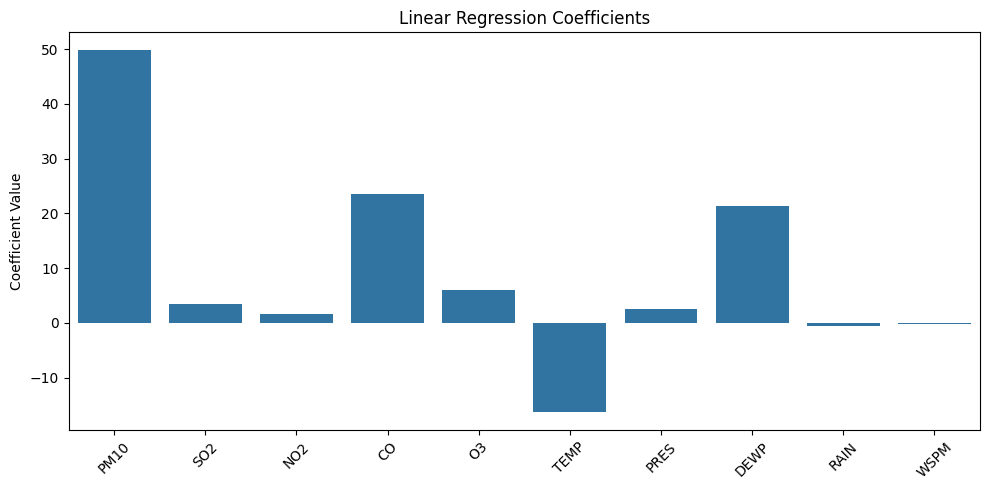

--- Decision Tree ---
R² Score: 0.86
MAE: 19.45
RMSE: 29.75



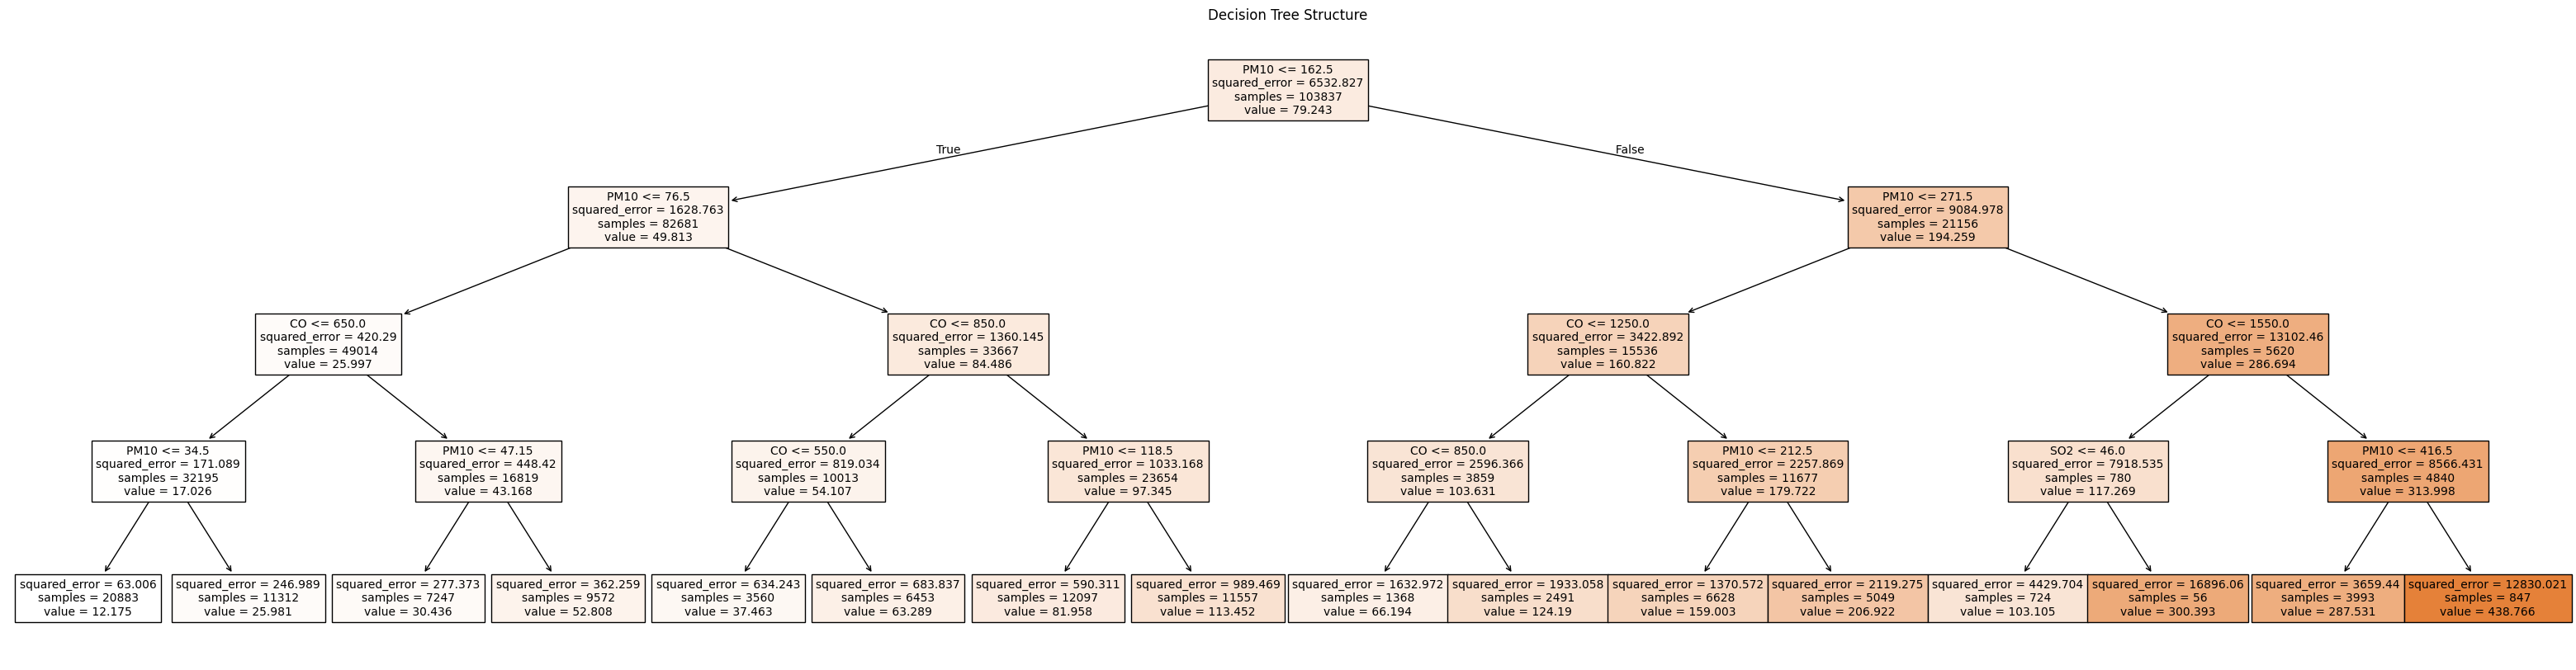

In [ ]:
# i think i have to install this library
!pip install seaborn scikit-learn matplotlib

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the cleaned dataset
df = pd.read_csv('merged_cleaned_PRSA_data.csv')

# Select features and target
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
X = df[features]
y = df['PM2.5']

# Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to print metrics
def print_metrics(model_name, y_true, y_pred):
    print(f"--- {model_name} ---")
    print("R² Score:", round(r2_score(y_true, y_pred), 2))
    print("MAE:", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print()

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
print_metrics("Linear Regression", y_test, lr_preds)

# Coefficient plot
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=lr_model.coef_)
plt.xticks(rotation=45)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.tight_layout()
plt.show()

#  Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
print_metrics("Decision Tree", y_test, tree_preds)

# Visualize tree
plt.figure(figsize=(40, 10))
plot_tree(tree_model, feature_names=features, filled=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()



# 10. Conclusion

This project successfully demonstrated the end-to-end process of handling, analysing, and predicting air quality data using programming-driven analytical techniques. Beginning with raw environmental datasets from multiple locations, key preprocessing steps were undertaken to clean, merge, and standardise the data, laying the groundwork for accurate and meaningful analysis.

Through Exploratory Data Analysis (EDA), patterns such as right-skewed pollutant distributions and strong correlations between specific variables (e.g., PM2.5 and PM10) were identified. These insights guided the selection of features for machine learning modelling, helping predict PM2.5 levels — a key indicator of harmful air pollution.

Four regression models were evaluated (Linear Regression, Decision Tree, Random Forest, and KNN), with **Random Forest** consistently outperforming others in terms of accuracy and reliability. This model was integrated into an interactive **Streamlit** web application, allowing users to visualise data and make real-time predictions based on environmental inputs.

Version control was applied via **GitHub** to manage changes and maintain development structure across all phases of the project.

Ultimately, this assignment not only reinforced key data science and machine learning skills but also showcased the practical use of software tools and collaborative development methods to address real-world environmental challenges.
